<a href="https://colab.research.google.com/github/Getnana/Pertemuan-05-Lab/blob/main/Lab_Ai_Pertemuan_05_RandomForest%20%26%20SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
from google.colab import files
uploaded = files.upload()

Saving twitter_training.csv to twitter_training (1).csv


In [44]:
from google.colab import files
uploaded = files.upload()

Saving twitter_validation.csv to twitter_validation (1).csv


import needed package

In [45]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

In [ ]:
import os
for dirname, _, filenames in os.walk('kaggle/input'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

load dataset

In [ ]:
df_train = pd.read_csv("./twitter_training.csv")
df_val = pd.read_csv("./twitter_validation.csv")

In [ ]:
df_train

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [ ]:
df_val

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df_train.info() #info untuk kolom mana yang null dan tipe datanya apa

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [ ]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column                                                                                                                                                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                              --------------  ----- 
 0   3364                                                                                                                                                                                                                                                999 non-null    int64 
 1   Facebook                                                                   

In [ ]:
df_train = df_train.rename(columns={'2401': 'ID', 'Borderlands': 'platform', 'Positive': 'sentimen', 'im getting on borderlands and i will murder you all ,': 'text'})


In [ ]:
df_train

,ID,platform,sentimen,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [ ]:
df_val = df_val.rename(columns={'3364': 'ID', 'Facebook': 'platform', 'Irrelevant': 'sentimen', 'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣': 'text'})

In [ ]:
df_val

,ID,platform,sentimen,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
print(df_train["sentimen"].value_counts())
print(df_val["sentimen"].value_counts())

sentimen
Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64
sentimen
Neutral       285
Positive      277
Negative      266
Irrelevant    171
Name: count, dtype: int64


In [ ]:
print("Platform Counts - Training")
print(df_train["platform"].value_counts())
print(20*"==")
print("Platform Counts - Validation")
print(df_val["platform"].value_counts())

Platform Counts - Training
platform
Microsoft                            2400
MaddenNFL                            2400
TomClancysRainbowSix                 2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Overwatch                            2334
Xbox(Xseries)                        2334
johnson&johnson                      2328
Amazon                               2316
HomeDepot                            2310
PlayStation5(PS5)                    2310
CS-GO                                2304
Cyberpunk2077                        230

In [ ]:
# We're dropping unneeded columns

df_train = df_train.drop(["ID","platform"], axis=1)
df_val = df_val.drop(["ID","platform"], axis=1)

In [ ]:
df_train

,sentimen,text
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...
...,...,...
74676,Positive,Just realized that the Windows partition of my...
74677,Positive,Just realized that my Mac window partition is ...
74678,Positive,Just realized the windows partition of my Mac ...
74679,Positive,Just realized between the windows partition of...


In [ ]:
print(f"Rows: {df_train.shape[0]}, Columns: {df_train.shape[1]}")
print(f"Duplicates: {df_train.duplicated().sum()}")
print(f"missing data: {sum(df_train.isna().sum())}")

print(20*"==")

print(f"Rows: {df_val.shape[0]}, Columns: {df_val.shape[1]}")
print(f"Duplicates: {df_val.duplicated().sum()}")
print(f"missing data: {sum(df_val.isna().sum())}")

Rows: 74681, Columns: 2
Duplicates: 4909
missing data: 686
Rows: 999, Columns: 2
Duplicates: 1
missing data: 0


In [ ]:
kolom1=len(df_train.columns)
for i in range (0, kolom1):
  df_train=df_train[df_train.iloc[:,i]!='?']
  df_train=df_train[df_train.iloc[:,i]!='']
  df_train=df_train[~df_train.iloc[:,i].isna()]
df_train.info()
df_train.drop_duplicates(keep= 'first',inplace = True)

kolom=len(df_val.columns)
for i in range (0, kolom):
  df_val=df_val[df_val.iloc[:,i]!='?']
  df_val=df_val[df_val.iloc[:,i]!='']
  df_val=df_val[~df_val.iloc[:,i].isna()]
df_val.info()
df_val.drop_duplicates(keep= 'first',inplace = True)

print(f"Rows: {df_train.shape[0]}, Columns: {df_train.shape[1]}")
print(f"Duplicates: {df_train.duplicated().sum()}")
print(f"missing data: {sum(df_train.isna().sum())}")

print(20*"==")

print(f"Rows: {df_val.shape[0]}, Columns: {df_val.shape[1]}")
print(f"Duplicates: {df_val.duplicated().sum()}")
print(f"missing data: {sum(df_val.isna().sum())}")

<class 'pandas.core.frame.DataFrame'>
Index: 73995 entries, 0 to 74680
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentimen  73995 non-null  object
 1   text      73995 non-null  object
dtypes: object(2)
memory usage: 1.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentimen  999 non-null    object
 1   text      999 non-null    object
dtypes: object(2)
memory usage: 15.7+ KB
Rows: 69768, Columns: 2
Duplicates: 0
missing data: 0
Rows: 998, Columns: 2
Duplicates: 0
missing data: 0


In [ ]:
%pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 30.5 MB/s eta 0:00:00


Data Preparation (Advance)

In [ ]:
import re
import string
import emoji
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

# Pastikan resource NLTK terunduh
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')           # kalau belum pernah diunduh
nltk.download('omw-1.4')           # opsional tapi sering diperlukan
nltk.download('punkt')             # untuk tokenisasi, jika kamu pakai word_tokenize()

# Inisialisasi
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Kamus singkatan umum (bisa diperluas)
abbreviation_map = {
    "u": "you",
    "ur": "your",
    "r": "are",
    "btw": "by the way",
    "idk": "i do not know",
    "imo": "in my opinion",
    "imho": "in my humble opinion",
    "lol": "laughing out loud",
    "omg": "oh my god",
    "thx": "thanks",
    "pls": "please",
    "plz": "please",
    "dont": "do not",
    "cant": "cannot",
    "wont": "will not",
    "ive": "i have",
    "ill": "i will",
    "didnt": "did not",
    "doesnt": "does not",
    "isnt": "is not",
    "wasnt": "was not",
    "havent": "have not",
    "shouldnt": "should not",
    "couldnt": "could not",
    "wouldnt": "would not",
}

def get_wordnet_pos(word):
    """
    Helper function:
    Mengubah POS tag (part-of-speech) menjadi format yang bisa dipakai lemmatizer.
    """
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {
        'J': wordnet.ADJ,
        'N': wordnet.NOUN,
        'V': wordnet.VERB,
        'R': wordnet.ADV
    }
    return tag_dict.get(tag, wordnet.NOUN)


def preprocess_text(text):
    """
    Function for text preprocessing for English sentiment analysis.
    Includes:
      - lowercase
      - emoji handling
      - URL and number removal
      - punctuation removal
      - short form expansion
      - stopword removal
      - lemmatization
    """

    # Ensure input is string
    if not isinstance(text, str):
        text = str(text)

    # Lowercase
    text = text.lower()

    # Replace emojis with text description
    text = emoji.demojize(text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Expand common short forms
    words = text.split()
    expanded_words = [abbreviation_map.get(w, w) for w in words]
    text = ' '.join(expanded_words)

    # Tokenize and remove stopwords + lemmatize
    filtered_words = []
    for word in text.split():
        if word not in stop_words:
            pos = get_wordnet_pos(word)
            lemma = lemmatizer.lemmatize(word, pos)
            filtered_words.append(lemma)

    # Join cleaned text
    processed_text = ' '.join(filtered_words)

    # Clean extra whitespace
    processed_text = re.sub(r'\s+', ' ', processed_text).strip()

    return processed_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df_train['clean_text'] = df_train['text'].apply(preprocess_text)

print(df_train[['text','clean_text']])

                                                    text  \
0      I am coming to the borders and I will kill you...   
1      im getting on borderlands and i will kill you ...   
2      im coming on borderlands and i will murder you...   
3      im getting on borderlands 2 and i will murder ...   
4      im getting into borderlands and i can murder y...   
...                                                  ...   
74676  Just realized that the Windows partition of my...   
74677  Just realized that my Mac window partition is ...   
74678  Just realized the windows partition of my Mac ...   
74679  Just realized between the windows partition of...   
74680  Just like the windows partition of my Mac is l...   

                                              clean_text  
0                                       come border kill  
1                                 im get borderland kill  
2                              im come borderland murder  
3                               im get bord

In [ ]:
df_train

,sentimen,text,clean_text
0,Positive,I am coming to the borders and I will kill you...,come border kill
1,Positive,im getting on borderlands and i will kill you ...,im get borderland kill
2,Positive,im coming on borderlands and i will murder you...,im come borderland murder
3,Positive,im getting on borderlands 2 and i will murder ...,im get borderland murder
4,Positive,im getting into borderlands and i can murder y...,im get borderland murder
...,...,...,...
74676,Positive,Just realized that the Windows partition of my...,realize window partition mac like year behind ...
74677,Positive,Just realized that my Mac window partition is ...,realize mac window partition year behind nvidi...
74678,Positive,Just realized the windows partition of my Mac ...,realize window partition mac year behind nvidi...
74679,Positive,Just realized between the windows partition of...,realize window partition mac like year behind ...


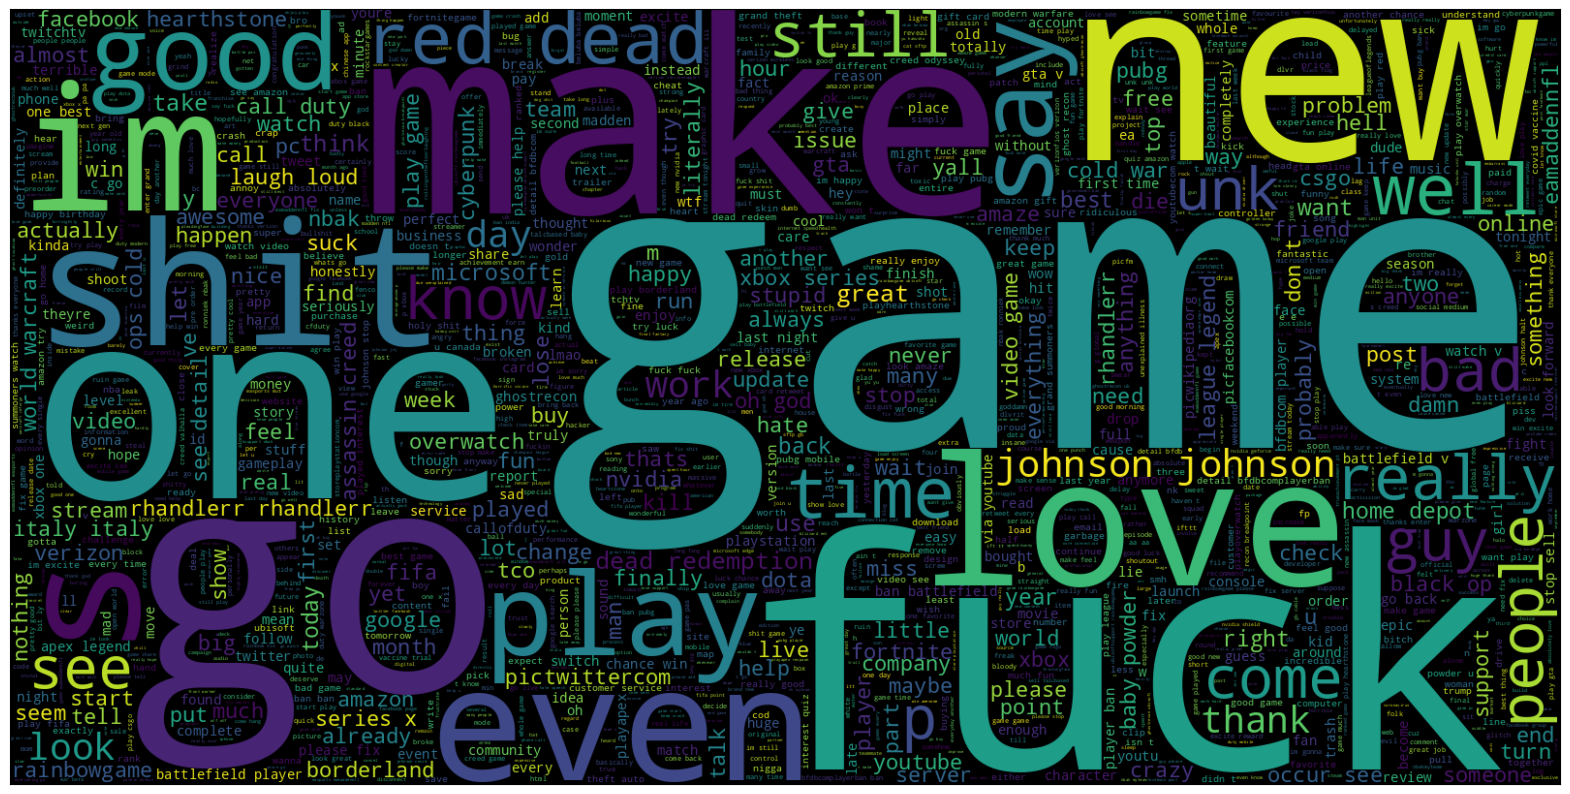

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=2000, width=1600, height=800, stopwords=STOPWORDS).generate(' '.join(df_train['clean_text']))
plt.imshow(wc, interpolation='bilinear')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
df_val['clean_text'] = df_val['text'].apply(preprocess_text)

print(df_val[['text','clean_text']])

                                                  text  \
0    BBC News - Amazon boss Jeff Bezos rejects clai...   
1    @Microsoft Why do I pay for WORD when it funct...   
2    CSGO matchmaking is so full of closet hacking,...   
3    Now the President is slapping Americans in the...   
4    Hi @EAHelp I’ve had Madeleine McCann in my cel...   
..                                                 ...   
994  ⭐️ Toronto is the arts and culture capital of ...   
995  tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...   
996  Today sucked so it’s time to drink wine n play...   
997  Bought a fraction of Microsoft today. Small wins.   
998  Johnson & Johnson to stop selling talc baby po...   

                                            clean_text  
0    bbc news amazon bos jeff bezos reject claim co...  
1    microsoft pay word function poorly samsungus c...  
2    csgo matchmaking full closet hack truly awful ...  
3    president slap american face really commit unl...  
4    hi eahelp i’v

In [ ]:
df_val

,sentimen,text,clean_text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon bos jeff bezos reject claim co...
1,Negative,@Microsoft Why do I pay for WORD when it funct...,microsoft pay word function poorly samsungus c...
2,Negative,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking full closet hack truly awful ...
3,Neutral,Now the President is slapping Americans in the...,president slap american face really commit unl...
4,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...,hi eahelp i’ve madeleine mccann cellar past ye...
...,...,...,...
994,Irrelevant,⭐️ Toronto is the arts and culture capital of ...,star toronto art culture capital canada it’s w...
995,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,actually good move tot bring viewer one people...
996,Positive,Today sucked so it’s time to drink wine n play...,today suck it’s time drink wine n play borderl...
997,Positive,Bought a fraction of Microsoft today. Small wins.,bought fraction microsoft today small win


Model Training

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define TF-IDF vectorizer (you can tune max_features, ngram_range etc. as needed)
tfidf = TfidfVectorizer(max_features=17000, ngram_range=(1,2))

In [ ]:
# Fit TF-IDF on training text and transform train and test text
X_train = tfidf.fit_transform(df_train['clean_text'])
X_test = tfidf.transform(df_val['clean_text'])

# Assuming your sentiment labels are in 'label' column in both dfs
y_train = df_train['sentimen']
y_test = df_val['sentimen']

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, f1_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
import inspect

def evaluate_model(model, X_test, y_test, model_name="Model"):
    """
    Evaluasi model klasifikasi multi-class:
      - ROC & AUC (macro)
      - Akurasi
      - F1-score (macro)
      - ROC Curve Plot
    Dapat digunakan untuk SVM, Random Forest, Logistic Regression, dll.
    """

    # Prediksi label
    y_pred = model.predict(X_test)

    # Coba ambil skor probabilitas atau decision function
    if hasattr(model, "decision_function"):
        decision_scores = model.decision_function(X_test)
    elif hasattr(model, "predict_proba"):
        decision_scores = model.predict_proba(X_test)
    else:
        raise ValueError(f"Model {model_name} tidak mendukung ROC (butuh decision_function atau predict_proba)")

    # Binarisasi label untuk ROC multi-class
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    n_classes = y_test_bin.shape[1]

    # Hitung ROC curve dan AUC untuk tiap kelas
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], decision_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # AUC rata-rata (macro)
    roc_auc["macro"] = roc_auc_score(y_test_bin, decision_scores, average="macro", multi_class="ovr")

    # Akurasi dan F1-score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f"======= Evaluasi Klasifikasi {model_name} =======")
    print(f"Akurasi Klasifikasi     : {accuracy * 100:.2f}%")
    print(f"F-measure (macro avg)   : {f1:.3f}")
    print(f"AUC rata-rata (macro)   : {roc_auc['macro']:.3f}")
    print("=" * 45)

    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown']

    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    # Garis diagonal (baseline)
    plt.plot([0, 1], [0, 1], 'k--', lw=1)

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Multi-Class {model_name}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    return {
        "model": model_name,
        "accuracy": accuracy,
        "f1_macro": f1,
        "auc_macro": roc_auc["macro"]
    }

##Logistic Regresion

In [ ]:
# Initialize and train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Accuracy: 0.9028056112224448
Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.90      0.87      0.89       171
    Negative       0.87      0.95      0.91       266
     Neutral       0.94      0.87      0.91       285
    Positive       0.90      0.91      0.90       276

    accuracy                           0.90       998
   macro avg       0.90      0.90      0.90       998
weighted avg       0.90      0.90      0.90       998



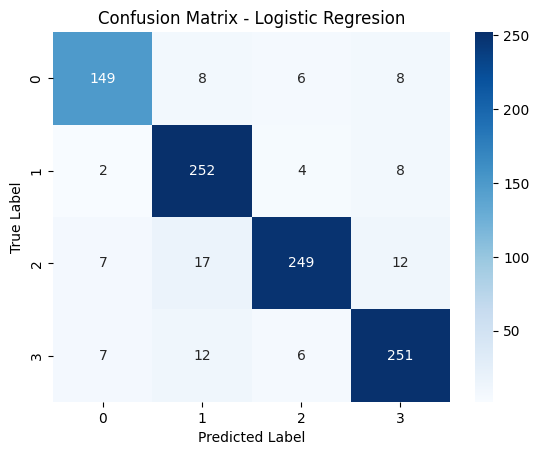

In [ ]:
# Predict on test data
y_predlr = model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_predlr))
print("Classification Report:\n", classification_report(y_test, y_predlr))

cm = confusion_matrix(y_test, y_predlr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regresion')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

======= Evaluasi Klasifikasi Logistic Regresion =======
Akurasi Klasifikasi     : 90.28%
F-measure (macro avg)   : 0.901
AUC rata-rata (macro)   : 0.973


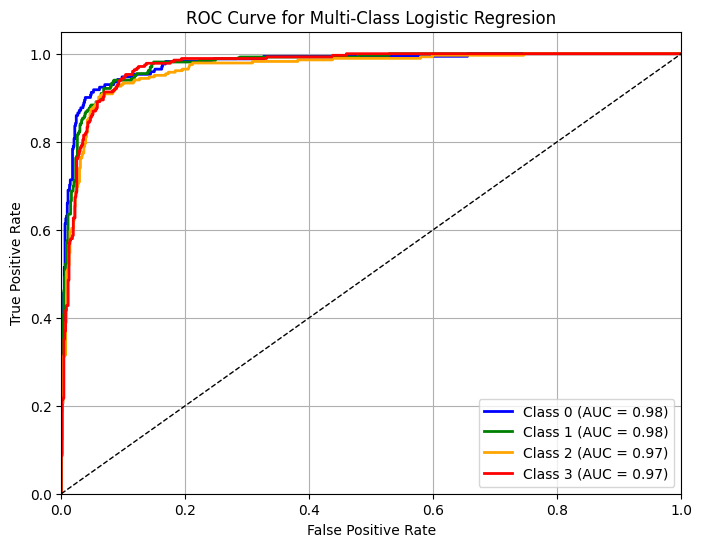

In [ ]:
lr_results = evaluate_model(model, X_test, y_test, model_name="Logistic Regresion")

##Random Forest

In [ ]:
# Import library dasar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk preprocessing dan model
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
# Baca CSV tanpa header (header=None) dan beri nama kolom yang sesuai
# Ganti path jika perlu: /content/... atau /mnt/data/...
train_df = pd.read_csv("/content/twitter_training.csv", header=None, names=['id','entity','sentiment','text'])
val_df   = pd.read_csv("/content/twitter_validation.csv", header=None, names=['id','entity','sentiment','text'])


In [ ]:
print("Train columns:", train_df.columns)
print(train_df.head(5))


Train columns: Index(['id', 'entity', 'sentiment', 'text'], dtype='object')
     id       entity sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [ ]:
# Cek nilai kosong & ringkasan label
print("\nMissing values (train):\n", train_df.isnull().sum())
print("\nLabel distribution (train):\n", train_df['sentiment'].value_counts())


Missing values (train):
 id             0
entity         0
sentiment      0
text         686
dtype: int64

Label distribution (train):
 sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64


In [ ]:
# Simple text cleaning function
def clean_text(text):
    if pd.isna(text):
        return ""
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", "", text)            # hapus URL
    text = re.sub(r"@\w+", "", text)                      # hapus mention
    text = re.sub(r"#[A-Za-z0-9_]+", "", text)            # hapus hashtag
    text = re.sub(r"[^a-z\s]", " ", text)                 # hanya huruf dan spasi
    text = re.sub(r"\s+", " ", text).strip()              # normalisasi spasi
    return text

In [ ]:
train_df['clean_text'] = train_df['text'].apply(clean_text)
val_df['clean_text']   = val_df['text'].apply(clean_text)

In [ ]:
# Siapkan fitur dan target (sesuaikan kolom 'sentiment' jika namanya beda)
X_train = train_df['clean_text']
y_train = train_df['sentiment']

X_val = val_df['clean_text']
y_val = val_df['sentiment']

In [ ]:
# Vectorize dengan TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec   = vectorizer.transform(X_val)

In [42]:
#Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_vec, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)


Accuracy: 0.963

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.98      0.94      0.96       172
    Negative       0.95      0.98      0.96       266
     Neutral       0.97      0.97      0.97       285
    Positive       0.96      0.96      0.96       277

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



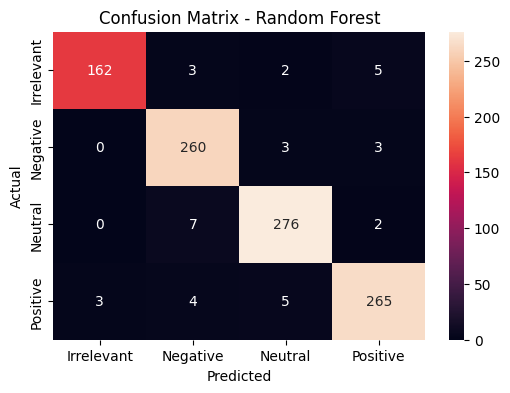

In [46]:
#Prediksi & evaluasi
y_pred = rf_model.predict(X_val_vec)

print("\nAccuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))

cm = confusion_matrix(y_val, y_pred, labels=sorted(y_val.unique()))
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=sorted(y_val.unique()), yticklabels=sorted(y_val.unique()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

## SVM

In [47]:
# TRAIN SVM (LinearSVC) — STEP BY STEP
# ============================

# Imports
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.calibration import CalibratedClassifierCV   # kalau butuh probability
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# 1) Buat model LinearSVC (default cepat dan baik untuk teks)

svc = LinearSVC(max_iter=10000, random_state=42)

In [49]:
# 2) (Opsional tapi direkomendasikan) Hyperparameter tuning untuk C dengan GridSearchCV
#    Kita cari C terbaik (regularisasi). Gunakan 3-fold CV agar cepat.

param_grid = {'C': [0.01, 0.1, 1, 10]}

grid = GridSearchCV(
    svc,
    param_grid,
    cv=3,
    scoring='f1_macro',   # bisa diganti 'accuracy' atau 'f1_weighted' sesuai kebutuhan
    n_jobs=-1,
    verbose=1
)

print("Mulai GridSearchCV untuk LinearSVC (mencari C terbaik)...")
grid.fit(X_train_vec, y_train)
print("Selesai GridSearch. Best params:", grid.best_params_)
print("Best CV score:", grid.best_score_)

# Ambil model terbaik
best_svc = grid.best_estimator_

Mulai GridSearchCV untuk LinearSVC (mencari C terbaik)...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Selesai GridSearch. Best params: {'C': 0.1}
Best CV score: 0.4292392209560913


In [50]:
# 3) (Opsional) Jika kamu butuh probabilitas output:
#    LinearSVC tidak punya .predict_proba; bungkus dengan CalibratedClassifierCV

do_calibrate = True   # ubah ke False kalau tidak perlu probabilitas
if do_calibrate:
    print("Membuat calibrated classifier (untuk probabilitas). Ini akan tambah waktu.")
    calibrated = CalibratedClassifierCV(best_svc, cv=3, method='isotonic')  # atau method='sigmoid'
    calibrated.fit(X_train_vec, y_train)
    model_to_use = calibrated
else:
    model_to_use = best_svc

Membuat calibrated classifier (untuk probabilitas). Ini akan tambah waktu.


In [51]:
# 4) Evaluasi model di validation set

print("\nEvaluasi pada validation set:")
y_pred = model_to_use.predict(X_val_vec)

acc = accuracy_score(y_val, y_pred)
print(f"Accuracy: {acc:.4f}\n")
print("Classification Report:\n", classification_report(y_val, y_pred))


Evaluasi pada validation set:
Accuracy: 0.7340

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.86      0.40      0.54       172
    Negative       0.66      0.89      0.76       266
     Neutral       0.81      0.69      0.74       285
    Positive       0.73      0.84      0.78       277

    accuracy                           0.73      1000
   macro avg       0.76      0.70      0.71      1000
weighted avg       0.76      0.73      0.72      1000



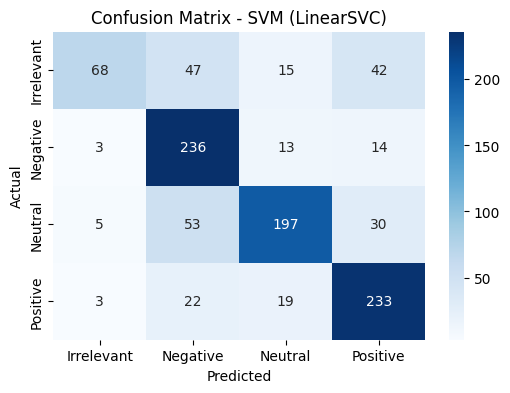

In [52]:
# Confusion matrix
labels_sorted = sorted(y_val.unique())
cm = confusion_matrix(y_val, y_pred, labels=labels_sorted)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=labels_sorted,
            yticklabels=labels_sorted,
            cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM (LinearSVC)")
plt.show()

In [53]:
# 5) Simpan model SVM dan (jika ada) calibrated wrapper

joblib.dump(model_to_use, "svm_sentiment_model.pkl")
print("\nModel SVM disimpan sebagai: svm_sentiment_model.pkl")


Model SVM disimpan sebagai: svm_sentiment_model.pkl


In [54]:
# 6) Contoh prediksi manual

sample_texts = [
    "I absolutely love this update, great job!",
    "This is the worst patch ever, totally broken."
]
sample_vec = vectorizer.transform(sample_texts)
preds = model_to_use.predict(sample_vec)
if do_calibrate:
    probs = model_to_use.predict_proba(sample_vec)   # tersedia karena dikalibrasi
    for txt, p, pr in zip(sample_texts, preds, probs):
        print(f"'{txt}' --> {p}  (probs: {pr})")
else:
    for txt, p in zip(sample_texts, preds):
        print(f"'{txt}' --> {p}")

'I absolutely love this update, great job!' --> Positive  (probs: [0.08991225 0.13096781 0.12706842 0.65205153])
'This is the worst patch ever, totally broken.' --> Negative  (probs: [0.10811866 0.69222743 0.08379749 0.11585642])
